In [5]:
import pandas as pd
import numpy as np
from scipy.sparse import load_npz

import matplotlib.pyplot as plt
import seaborn as sns

import os 

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import tensorflow.keras as keras
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings("ignore")

### Import data

In [2]:
X_trans = load_npz("../data/X_trans.npz")
y = np.loadtxt("../data/y.txt")

### Split

In [3]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

## Model

In [8]:
eva_df = pd.DataFrame(columns = ["Model", "RMSE", "MAE", "R2" ])     

### Neural network

In [11]:
a_model = keras.models.Sequential([
    keras.layers.Dense(units = 600, activation="relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(units = 200, activation="relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(units = 50, activation="relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(1)
])

a_model.compile(loss="mean_squared_error",
                optimizer='adam')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

a_model.fit(X_train, y_train,
            epochs = 100,
            validation_data=(X_val, y_val),
            callbacks = [early_stopping_cb])



Epoch 1/100

44965/44965 [==============================] - 176s 4ms/step - loss: 45324776.0000 - val_loss: 35284884.0000
Epoch 2/100
44965/44965 [==============================] - 184s 4ms/step - loss: 36681668.0000 - val_loss: 33190922.0000
Epoch 3/100
44965/44965 [==============================] - 193s 4ms/step - loss: 34304036.0000 - val_loss: 31847850.0000
Epoch 4/100
44965/44965 [==============================] - 202s 4ms/step - loss: 32894992.0000 - val_loss: 31888768.0000
Epoch 5/100
44965/44965 [==============================] - 213s 5ms/step - loss: 31991940.0000 - val_loss: 31116240.0000
Epoch 6/100
44965/44965 [==============================] - 217s 5ms/step - loss: 31294198.0000 - val_loss: 30995660.0000
Epoch 7/100
44965/44965 [==============================] - 219s 5ms/step - loss: 30695516.0000 - val_loss: 28287702.0000
Epoch 8/100
44965/44965 [==============================] - 203s 4ms/step - loss: 30201994.0000 - val_loss: 31619292.0000
Epoch 9/100
44965/44965 [====

In [6]:
#a_model = load_model('./model/reg.h5')

In [9]:
y_pred = a_model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

eva_df = eva_df.append({"Model": "Neural Network", "RMSE" : mse**0.5, "MAE":mae ,"R2" : R2},ignore_index=True)
eva_df

14052/14052 [==============================] - 22s 2ms/step


,Model,RMSE,MAE,R2
0,Neural Network,4999.289558,2784.874343,0.844596


Text(0.5, 1.0, 'Actual vs Residual')

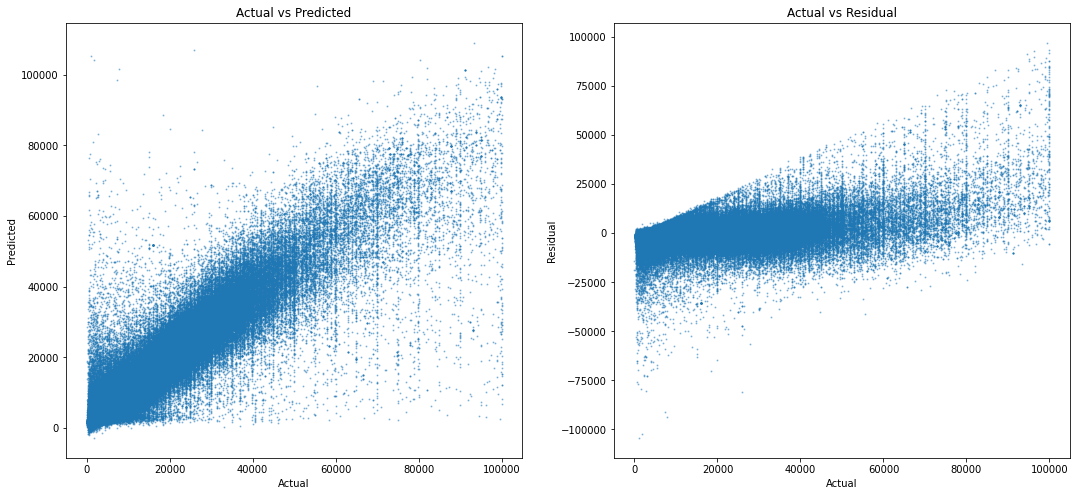

In [18]:
y_pred = y_pred.flatten()
e = y_test - y_pred

fig, ax = plt.subplots(1,2, figsize= (18,8))

ax[0].scatter(y_test, y_pred, s = 1, alpha = 0.4)
ax[0].set_xlabel('Actual')
ax[0].set_ylabel('Predicted')
ax[0].set_title('Actual vs Predicted')

ax[1].scatter(y_test, e, s = 1, alpha = 0.4)
ax[1].set_xlabel('Actual')
ax[1].set_ylabel('Residual')
ax[1].set_title('Actual vs Residual')

### Save

In [ ]:
a_model.save('./model/reg.h5')